## Manual authentication
### Get token
chain the login commands in the function get_token:

https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
https://medium.com/analytics-vidhya/build-your-own-playlist-generator-with-spotifys-api-in-python-ceb883938ce4
https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3

In [1]:
import spotifyAPI
from secret import clientId,clientSecret

token  = spotifyAPI.get_token(clientId,clientSecret)
token

'BQCi2PL8tEvq0UHIbdfK_sMQ5C-224neNLwCKYE74r64GDx0WhzpCdcK8x0j9pVVf8bt82HS1W__Ec6OW7I'

### Get song

In [2]:
lucy_id = spotifyAPI.get_track_id2('Lucy in the Sky', token, artist = 'The Beatles')
# spotifyAPI.get_track_id2('Lucy in the Sky with Diamonds', token)
print(lucy_id)

25yQPHgC35WNnnOUqFhgVR


https://open.spotify.com/track/25yQPHgC35WNnnOUqFhgVR

In [3]:
url = "https://open.spotify.com/track/"+lucy_id
import webbrowser
webbrowser.open(url)

True

### Get features

In [4]:
lucy_features = spotifyAPI.get_features(lucy_id,token)
lucy_features

{'danceability': 0.311,
 'energy': 0.325,
 'key': 2,
 'loudness': -9.042,
 'mode': 1,
 'speechiness': 0.0283,
 'acousticness': 0.0469,
 'instrumentalness': 0,
 'liveness': 0.139,
 'valence': 0.668,
 'tempo': 65.09,
 'type': 'audio_features',
 'id': '25yQPHgC35WNnnOUqFhgVR',
 'uri': 'spotify:track:25yQPHgC35WNnnOUqFhgVR',
 'track_href': 'https://api.spotify.com/v1/tracks/25yQPHgC35WNnnOUqFhgVR',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25yQPHgC35WNnnOUqFhgVR',
 'duration_ms': 208467,
 'time_signature': 1}

In [5]:
import pandas as pd
# df_features = spotifyAPI.parse_features(lucy_features)
df = pd.DataFrame(lucy_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0469,0.311,0.325,0,0.139,0.0283,0.668


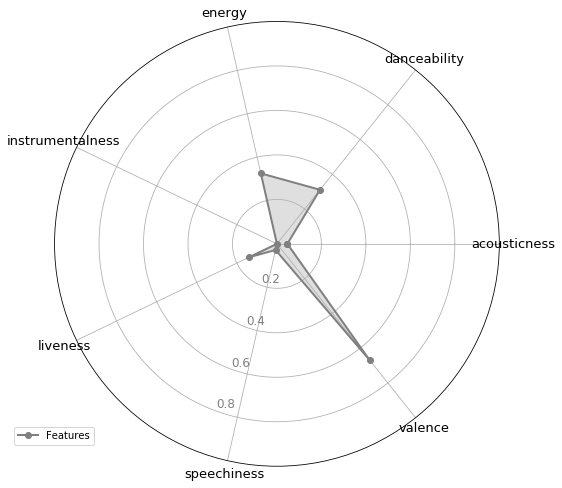

In [6]:
spotifyAPI.feature_plot(df_features)

### Get recommendations

In [8]:
json_response = spotifyAPI.get_track_reco(lucy_id,token)
uris =[]
for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

"Oh! Darling - Remastered 2009" by The Beatles
"The Man Who Sold the World - 2015 Remaster" by David Bowie
"Have a Cigar" by Pink Floyd
"Live And Let Die - 2018 Remaster" by Wings
"She's Not There" by The Zombies
"God Only Knows - Remastered" by The Beach Boys
"Castles Made of Sand" by Jimi Hendrix
"Jealous Guy - Remastered 2010" by John Lennon
"Who Loves the Sun - 2015 Remaster" by The Velvet Underground
"Eleanor Rigby - Remastered 2009" by The Beatles


### Advanced recommendations based on seeds
https://developer.spotify.com/console/get-recommendations/

In [ ]:
limit = 10
market = "ES"
seed_artists = "4NHQUGzhtTLFvgF5SZesLK"
seed_genre = "country"
seed_tracks = "0c6xIDDpzE81m2q797ordA"
recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&market={market}&seed_artists={seed_artists}&seed_genres={seed_genre}&seed_tracks={seed_tracks}"

headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=recUrl, headers=headers)

# print(json.dumps(res.json(), indent=2))

uris = []
json_response = res.json()

for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

### Artist albums

In [9]:
import pandas as pd
artists = pd.read_csv('spotify-artist-uris.csv', header=None, index_col=0, squeeze=True).to_dict()

In [10]:
artists['Michael Jackson']

'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'

In [11]:
from secret import *
os.environ["SPOTIPY_CLIENT_ID"] = clientId
os.environ["SPOTIPY_CLIENT_SECRET"] = clientSecret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

mj_uri = artists['Michael Jackson']
results = sp.artist_albums(mj_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Scream
XSCAPE
XSCAPE - Track by Track Commentary
Michael
Invincible
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
Manila 1996
HIStory - PAST, PRESENT AND FUTURE - BOOK I
HIStory - PAST, PRESENT AND FUTURE - BOOK I
Dangerous
Bad (Remastered)
Bad 25th Anniversary
Thriller
Thriller
Thriller 25 Super Deluxe Edition
Off the Wall
Forever Michael
Forever, Michael
Music And Me
Music & Me
Music and Me
Ben
Ben
Got To Be There
Got To Be There


In [13]:
url = "https://open.spotify.com/artist/"+mj_uri.replace('spotify:artist:','')
import webbrowser
webbrowser.open(url)

True

### Artist top tracks

In [14]:
import ipywidgets as widgets
artist = widgets.Text(value='Led Zeppelin')
artist

Text(value='Led Zeppelin')

In [15]:
# how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:
lz_uri = artists[artist.value]

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Ramble On - 1990 Remaster
audio    : https://p.scdn

### Search

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

The following code collects 1,000 Track IDs and their associated track name, artist name, and popularity score.
(it does not require a Spotify ID)

In [16]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

In [17]:
import pandas as pd
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_dataframe.shape)
track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,SZA,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,93
1,Ema Spatula,Year 2020,6s0QJ4tfTOkkkOMQz8HCrg,30
2,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,96
3,TobyMac,21 Years,5GBOziM7lfPhDKPGqP1SP4,0
4,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,96


## Reload upon modification

In [ ]:
import importlib
importlib.reload(spotifyAPI)